<a href="https://colab.research.google.com/github/misspriyanshigupta-ctrl/Projects/blob/main/E_commerce_Furniture_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_furniture_dataset_2024.csv to ecommerce_furniture_dataset_2024 (3).csv


In [ ]:
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [ ]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [ ]:
df.shape

(2000, 5)

In [ ]:
df.drop(['originalPrice'],axis=1,inplace=True)

In [ ]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$21.37,1,Free shipping


In [ ]:
df['tagText'].nunique()

100

In [ ]:
df['tagText'].value_counts()

,count
tagText,
Free shipping,1880
+Shipping: $5.09,9
+Shipping: $239.64,2
+Shipping: $80.21,2
+Shipping: $94.92,2
...,...
+Shipping: $134.27,1
+Shipping: $151.69,1
+Shipping: $41.93,1


In [ ]:
# Replace all values except 'Free shipping' and '+Shipping: $5.09' with 'others'
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

In [ ]:
# Display the modified value counts
print(df['tagText'].value_counts())

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64


In [ ]:
import seaborn as sns

<Axes: xlabel='tagText', ylabel='count'>

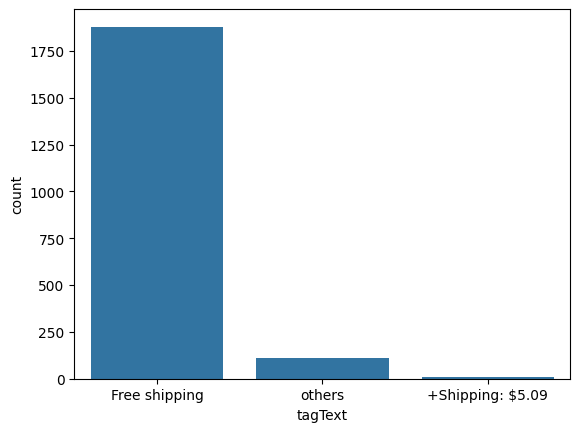

In [ ]:
sns.countplot(x='tagText',data=df)

In [ ]:
df['price'] = df['price'].replace('[\$,]', '',regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-673065057.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '',regex=True).astype(float)


In [ ]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


/tmp/ipython-input-444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

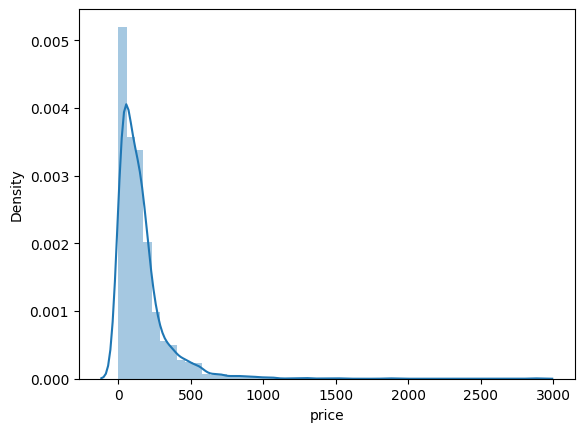

In [ ]:
sns.distplot(df['price'])

/tmp/ipython-input-2507294489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold'])


<Axes: xlabel='sold', ylabel='Density'>

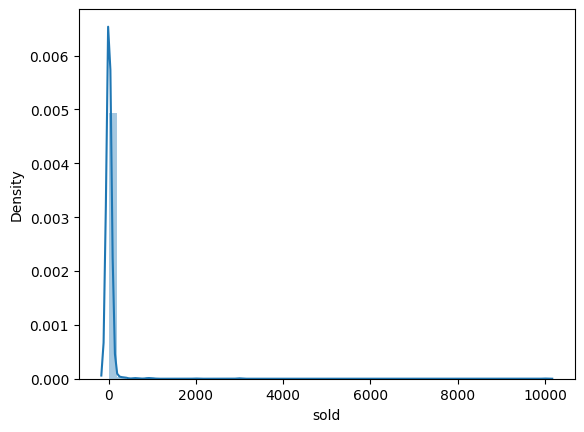

In [ ]:
sns.distplot(df['sold'])

<Axes: xlabel='price', ylabel='sold'>

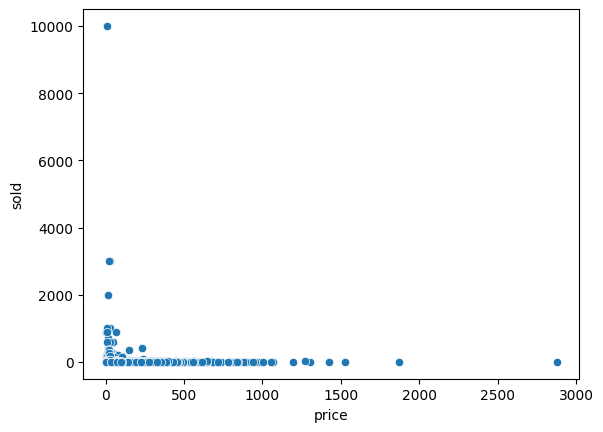

In [ ]:
sns.scatterplot(x='price', y='sold', data=df)

In [ ]:
filtered_df = df[df['tagText'] == 'Free shipping']

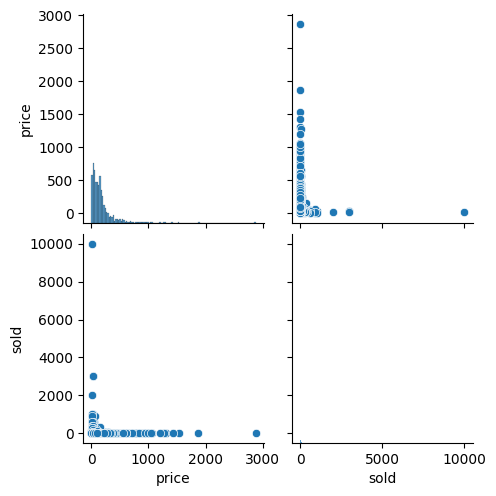

In [ ]:
# Create a pairplot including the 'sold' column and other relevant columns
sns.pairplot(filtered_df[['price', 'sold']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['tagText']=le.fit_transform(df['tagText'])

In [ ]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,1


In [ ]:
df['tagText'].value_counts()

,count
tagText,
1,1880
2,111
0,9
